In [31]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

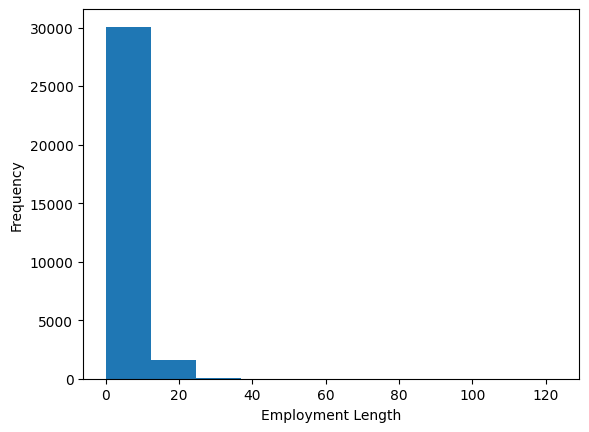

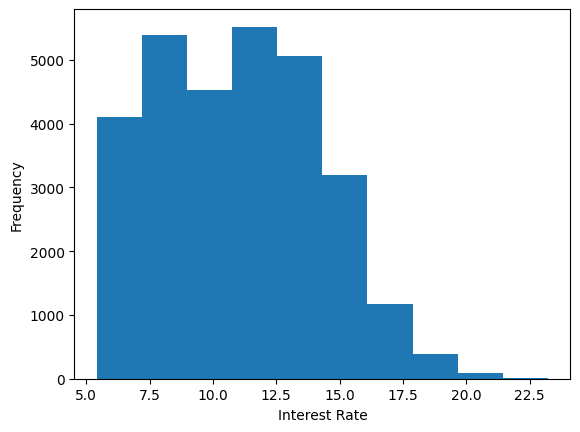

In [4]:
#two columns have null data, will take a look to see the best way to fix the data

plt.hist(df['person_emp_length'])
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['loan_int_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()



In [5]:
#neither column exhibits a standard normal distribution, will use median to fill null data

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


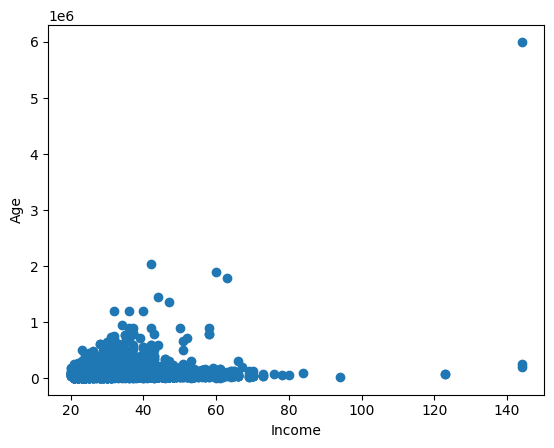

In [7]:
#handling outliers

plt.scatter(df['person_age'],df['person_income'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [8]:
#we can see that there are mulptiple outliers with the two categories so were are going to drop values where the age is over 100 & income is over 3,000,000

df[df['person_income'] >= 3000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [9]:
df[df['person_age'] >= 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [10]:
df = df[df['person_income'] < 3000000]
df = df[df['person_age'] < 100]

In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.767835,9589.117755,11.009486,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.087437,6321.886846,3.081794,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [12]:
pd.crosstab(df['cb_person_default_on_file'],df['loan_grade'])

loan_grade,A,B,C,D,E,F,G
cb_person_default_on_file,,,,,,,
N,10777,10448,3200,1750,499,129,28
Y,0,0,3256,1876,465,112,36


In [13]:
# 0 is non-default and 1 is default
pd.crosstab(df['loan_status'],df['loan_grade'])

loan_grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,9704,8747,5117,1485,343,71,1
1,1073,1701,1339,2141,621,170,63


In [17]:
#now the categorical data must be converted to binary to be used in the ML model

defHist = pd.get_dummies(df['cb_person_default_on_file'])
defHist = defHist.drop(['N'], axis=1)
defHist = defHist.rename(columns = {'Y' : 'default_hist'})

homeOwn = pd.get_dummies(df['person_home_ownership'])
intent =  pd.get_dummies(df['loan_intent'])
lGrade = pd.get_dummies(df['loan_grade'])

modelData = pd.concat((df, defHist, homeOwn, intent, lGrade), axis=1)
modelData.drop(['cb_person_default_on_file', 'person_home_ownership', 'loan_intent', 'loan_grade'],axis=1, inplace=True)
modelData


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,default_hist,MORTGAGE,...,MEDICAL,PERSONAL,VENTURE,A,B,C,D,E,F,G
0,22,59000,123.0,35000,16.02,1,0.59,3,True,False,...,False,True,False,False,False,False,True,False,False,False
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,True,...,True,False,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,True,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,True,...,False,True,False,False,False,True,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,True,...,False,True,False,True,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,False,True,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,True,...,False,True,False,False,True,False,False,False,False,False


In [15]:
X = modelData.drop(['loan_status'], axis=1)
Y = modelData['loan_status']

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state = 16)

logReg = LogisticRegression(solver='lbfgs')
logReg.fit(xTrain, yTrain)


LogisticRegression()

In [32]:
acc = logReg.score(xTest, yTest)
acc

0.8046414538310412

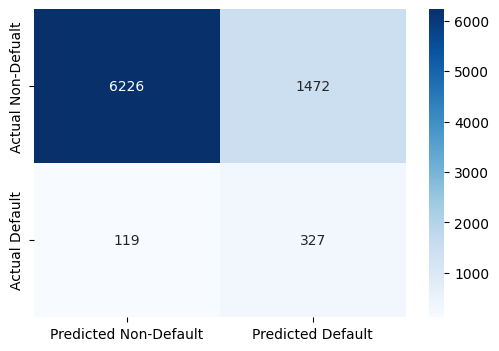

In [30]:
#displaying confusion matrix
yPred = logReg.predict(xTest)

cm = confusion_matrix(yPred,yTest)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Defualt', 'Actual Default'])
plt.show()

In [39]:
#will now use gridsearch for hyperparameter tuning 
params = {
    'C' : [0.01,0.1,1,10,100],
    'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg'],
    'max_iter' : [1000,]
    
}

gridSearch = GridSearchCV(estimator=logReg, param_grid=params, cv=5,scoring='accuracy')
gridSearch.fit(xTrain, yTrain)

best_model = gridSearch.best_estimator_
accuracy = best_model.score(xTest, yTest)
accuracy


/home/patrick/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/patrick/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/patrick/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/patrick/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/patrick/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

0.8654223968565815

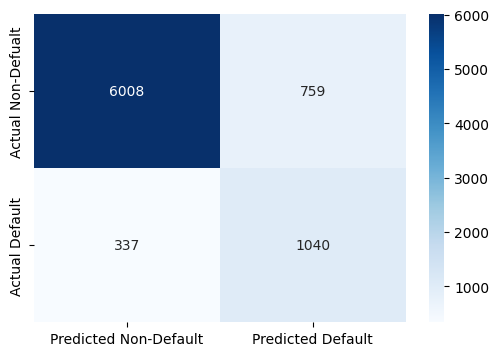

In [42]:
yPred = best_model.predict(xTest)

cm = confusion_matrix(yPred,yTest)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Defualt', 'Actual Default'])
plt.show()